# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys_FJGD import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url= f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S') #Time of data calculation, unix, UTC

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | vorgashor
Processing Record 3 of Set 1 | karosta
City not found. Skipping...
Processing Record 4 of Set 1 | enewetak
Processing Record 5 of Set 1 | roma
Processing Record 6 of Set 1 | san luis
Processing Record 7 of Set 1 | lospalos
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | munkkiniemi
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | udachny
Processing Record 12 of Set 1 | elmendorf air force base
City not found. Skipping...
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | kapuskasing
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | choyr
Processing Record 17 of Set 1 | sucre
Processing Record 18 of Set 1 | nar'yan-mar
Processing Record 19 of Set 1 | moro
Processing Record 20 of Set 1 | stanley
Processing Record 21 of Set 1 | isafjordur
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,11.57,81,100,0.89,NZ,2023-07-16 02:32:01
1,vorgashor,67.5833,63.9500,14.07,62,35,1.36,RU,2023-07-16 02:22:27
2,enewetak,11.3474,162.3373,28.08,80,60,7.63,MH,2023-07-16 02:32:02
3,roma,43.2128,-75.4557,26.08,73,0,3.09,US,2023-07-16 02:28:39
4,san luis,-33.2950,-66.3356,6.14,62,0,5.24,AR,2023-07-16 02:32:03


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.57,81,100,0.89,NZ,2023-07-16 02:32:01
1,vorgashor,67.5833,63.9500,14.07,62,35,1.36,RU,2023-07-16 02:22:27
2,enewetak,11.3474,162.3373,28.08,80,60,7.63,MH,2023-07-16 02:32:02
3,roma,43.2128,-75.4557,26.08,73,0,3.09,US,2023-07-16 02:28:39
4,san luis,-33.2950,-66.3356,6.14,62,0,5.24,AR,2023-07-16 02:32:03


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

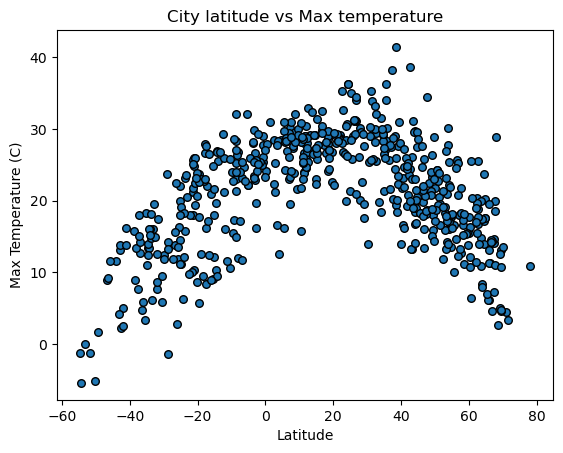

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
city_data_df.plot.scatter('Lat','Max Temp',edgecolor='black',s=30)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.title('City latitude vs Max temperature')
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

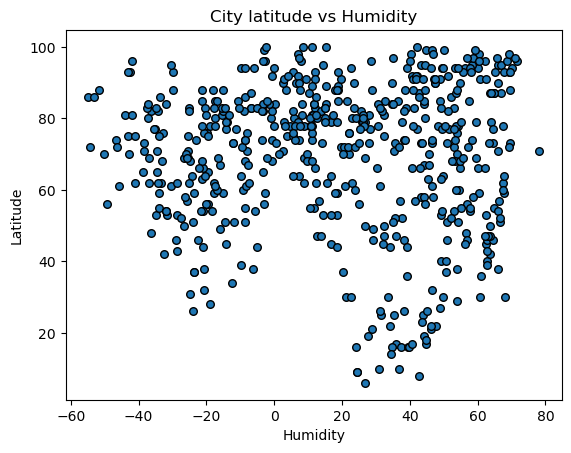

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
city_data_df.plot.scatter('Lat','Humidity',edgecolor='black',s=30)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('City latitude vs Humidity')
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot

plt.show()

#### Latitude Vs. Cloudiness

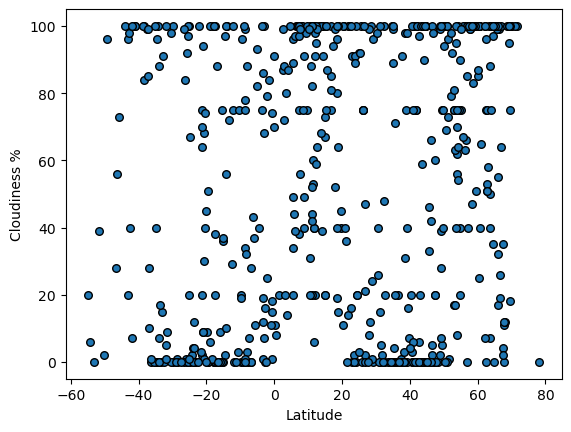

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

city_data_df.plot.scatter('Lat','Cloudiness',edgecolor='black',s=30)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

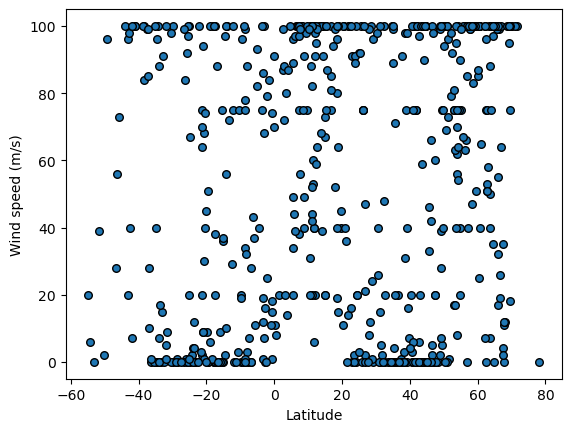

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
city_data_df.plot.scatter('Lat','Cloudiness',edgecolor='black',s=30)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylabel('Wind speed (m/s)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regression_plots(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(20,5),fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")



In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df=city_data_df.copy()
northern_hemi_df=northern_hemi_df.loc[northern_hemi_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vorgashor,67.5833,63.9500,14.07,62,35,1.36,RU,2023-07-16 02:22:27
2,enewetak,11.3474,162.3373,28.08,80,60,7.63,MH,2023-07-16 02:32:02
3,roma,43.2128,-75.4557,26.08,73,0,3.09,US,2023-07-16 02:28:39
6,bethel,41.3712,-73.4140,25.98,83,100,2.62,US,2023-07-16 02:32:04
7,munkkiniemi,60.1991,24.8744,15.46,94,85,0.45,FI,2023-07-16 02:32:05


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df=city_data_df.copy()
southern_hemi_df=southern_hemi_df.loc[southern_hemi_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.57,81,100,0.89,NZ,2023-07-16 02:32:01
4,san luis,-33.2950,-66.3356,6.14,62,0,5.24,AR,2023-07-16 02:32:03
5,lospalos,-8.5186,127.0025,25.21,68,78,5.42,TL,2023-07-16 02:20:25
8,bredasdorp,-34.5322,20.0403,13.42,71,96,3.96,ZA,2023-07-16 02:20:08
12,port-aux-francais,-49.3500,70.2167,1.68,56,96,14.31,TF,2023-07-16 02:32:06


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4236675586523913


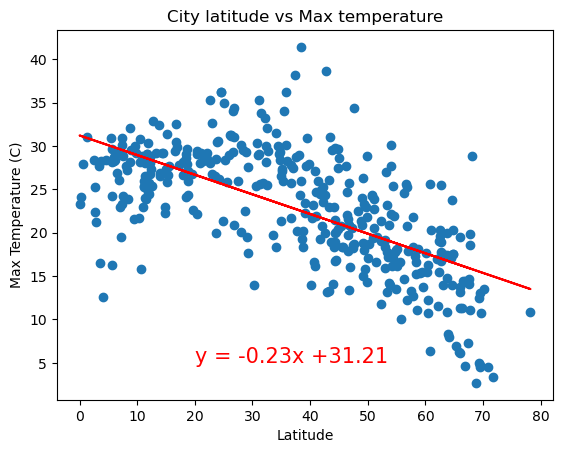

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
linear_regression_plots(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.title('City latitude vs Max temperature')
plt.show()

The r-value is: 0.5169889181001412


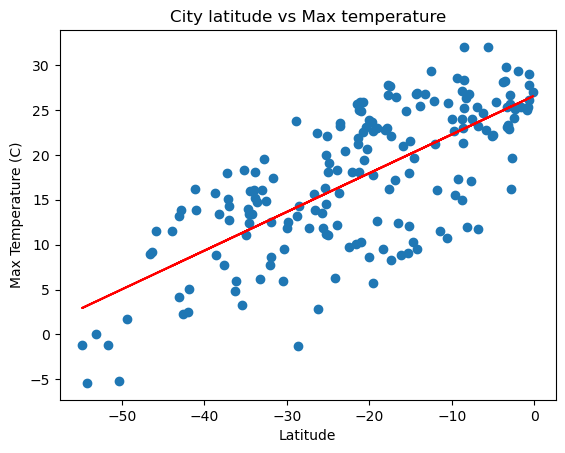

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
linear_regression_plots(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.title('City latitude vs Max temperature')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.007259135144816739


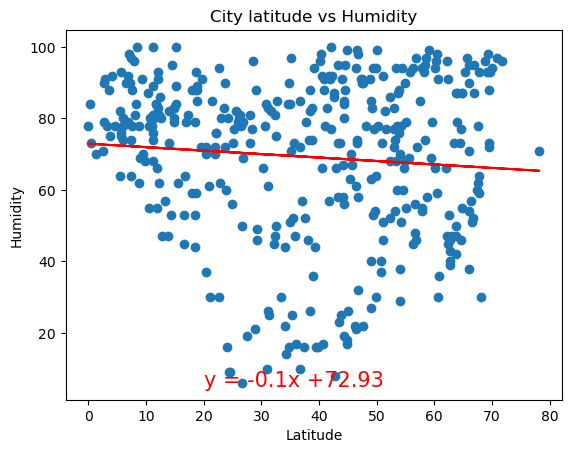

In [17]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regression_plots(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('City latitude vs Humidity')
plt.show()

The r-value is: 0.0048480072977522826


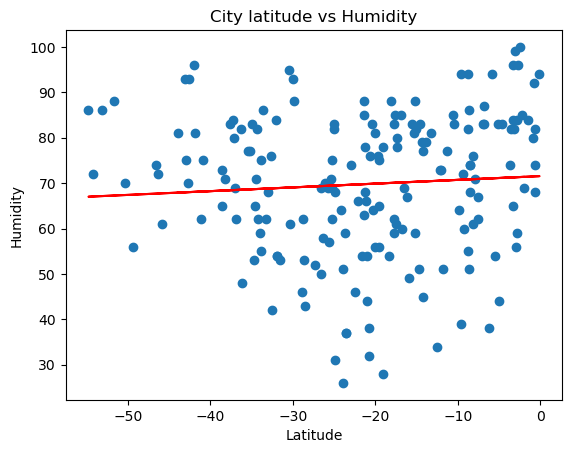

In [18]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regression_plots(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('City latitude vs Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0013461085579282324


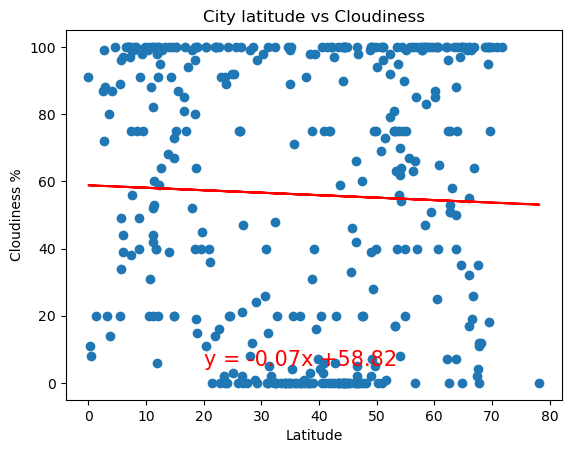

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regression_plots(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.title('City latitude vs Cloudiness')
plt.show()

The r-value is: 0.0039142839000199285


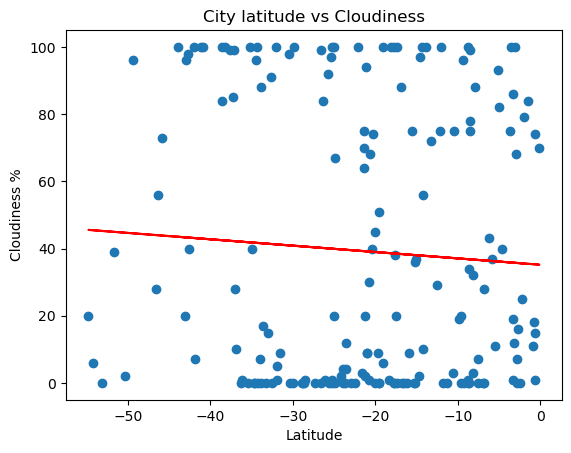

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regression_plots(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.title('City latitude vs Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
As we can see on the above graph the is no clear relationship between Latitude and Cloudiness.
The r value is below 0.50 which confirms that there is no relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01290040588172876


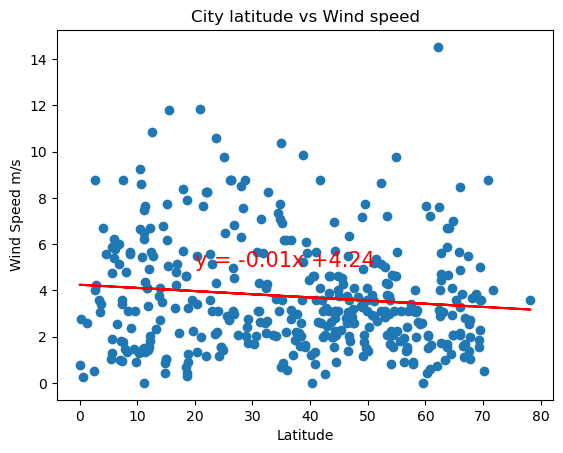

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regression_plots(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
plt.ylabel('Wind Speed m/s')
plt.xlabel('Latitude')
plt.title('City latitude vs Wind speed')
plt.show()

The r-value is: 0.02456906297697644


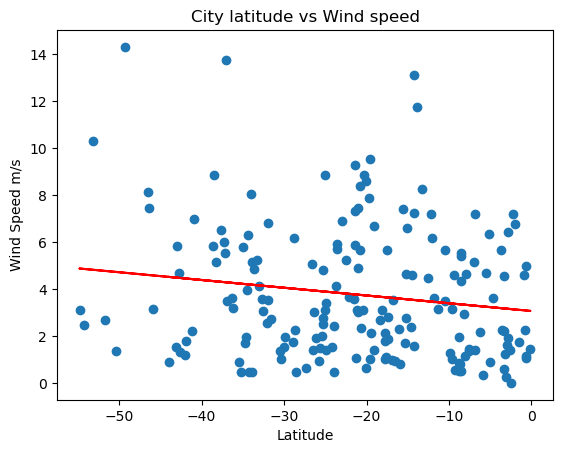

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regression_plots(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
plt.ylabel('Wind Speed m/s')
plt.xlabel('Latitude')
plt.title('City latitude vs Wind speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Looking to the scatter plot graph and the regression line, it seems there is a correlation betwen the Latitude and the Wind speed. However, the r value is below 0.50 which let us know that this visual perception is incorrect.